## Maven Music Challenge

### Spotify Streaming History
Spotify user's complete music streaming history data, including timestamps, track, artist, and album names, and reasons for playing and ending each track.

### Challenge Objective
Every December, millions of Spotify users look forward to their Spotify Wrapped – a personalized recap showcasing their listening habits over the past year.

Wrapped has become a social and cultural phenomenon, including breakdowns of listeners' most-streamed artists and tracks, total minutes listened, personalized playlists, and even video messages from artists to their top fans.

For the Maven Music Challenge, your task is to create your own version of Spotify Wrapped, by downloading your streaming history or using the sample dataset provided (if you aren't a Spotify user).

In [28]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Set Seaborn style for better visuals
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

In [29]:
# read the dataset
data = pd.read_csv("Spotify_Streaming_History/spotify_history.csv")
data.shape

(149860, 11)

In [30]:
# let's look at few records
data.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,7/8/2013 2:44,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,7/8/2013 2:45,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,7/8/2013 2:50,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,7/8/2013 2:52,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,7/8/2013 3:17,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


#### Data Dictionary

 - spotify_track_uri: Spotify URI that uniquely identifies each track in the form of "spotify:track:<base-62 string>"
 - ts: Timestamp indicating when the track stopped playing in UTC (Coordinated Universal Time)
 - platform: Platform used when streaming the track
 - ms_played: Number of milliseconds the stream was played
 - track_name: Name of the track
 - artist_name: Name of the artist
 - album_name: Name of the album
 - reason_start: Why the track started
 - reason_end: Why the track ended
 - shuffle: TRUE or FALSE depending on if shuffle mode was used when playing the track
 - skipped: TRUE of FALSE depending on if the user skipped to the next song


In [31]:
# check the datatypes
data.dtypes

spotify_track_uri    object
ts                   object
platform             object
ms_played             int64
track_name           object
artist_name          object
album_name           object
reason_start         object
reason_end           object
shuffle                bool
skipped                bool
dtype: object

In [32]:
# descriptive statistics
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
spotify_track_uri,149860,16527,1BLOVHYYlH4JUHQGcpt75R,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ts,149860,95738,7/27/2017 20:11,209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platform,149860,6,android,139821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ms_played,149860.0,NaN,NaN,NaN,128316.635093,117840.060332,0.0,2795.0,138840.0,218507.0,1561125.0
track_name,149860,13839,Ode To The Mets,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_name,149860,4113,The Beatles,13621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
album_name,149860,7946,The Beatles,2063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reason_start,149717,13,trackdone,76655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reason_end,149743,15,trackdone,77194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shuffle,149860,2,True,111583,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# convert column "ts" into a datetime format
data['ts'] = pd.to_datetime(data['ts'])

In [34]:
data.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:00,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:00,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:00,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:00,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:00,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [35]:
# concise summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   spotify_track_uri  149860 non-null  object        
 1   ts                 149860 non-null  datetime64[ns]
 2   platform           149860 non-null  object        
 3   ms_played          149860 non-null  int64         
 4   track_name         149860 non-null  object        
 5   artist_name        149860 non-null  object        
 6   album_name         149860 non-null  object        
 7   reason_start       149717 non-null  object        
 8   reason_end         149743 non-null  object        
 9   shuffle            149860 non-null  bool          
 10  skipped            149860 non-null  bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(7)
memory usage: 10.6+ MB


In [36]:
# check for duplicate records
data.duplicated().sum()

1782

In [37]:
data = data.drop_duplicates()

In [38]:
# check for duplicate records
data.duplicated().sum()

0

In [39]:
# check for null/missing values
data.isnull().sum()

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64

In [40]:
# fill the missing values with reason "unknown"
data['reason_start'] = data['reason_start'].fillna("unknown")
data['reason_end'] = data['reason_end'].fillna("unknown")

In [41]:
# check for null/missing values
data.isnull().sum()

spotify_track_uri    0
ts                   0
platform             0
ms_played            0
track_name           0
artist_name          0
album_name           0
reason_start         0
reason_end           0
shuffle              0
skipped              0
dtype: int64

In [42]:
# Extracting date and time components
data['year'] = data['ts'].dt.year
data['month'] = data['ts'].dt.month_name()
data['day'] = data['ts'].dt.day
data['day_of_week'] = data['ts'].dt.day_name()
data['hour'] = data['ts'].dt.hour

In [43]:
# Categorize periods of the day
def get_day_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

data['day_period'] = data['hour'].apply(get_day_period)

In [44]:
# Play duration category
data['play_duration_category'] = pd.cut(
    data['ms_played'], 
    bins=[-1, 2795, 138840, 218507, 1561125], 
    labels=['Very Short', 'Short', 'Medium', 'Full'],
    right=True)

In [45]:
data.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,year,month,day,day_of_week,hour,day_period,play_duration_category
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:00,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,2013,July,8,Monday,2,Night,Short
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:00,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,2013,July,8,Monday,2,Night,Short
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:00,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,2013,July,8,Monday,2,Night,Full
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:00,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2013,July,8,Monday,2,Night,Short
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:00,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False,2013,July,8,Monday,3,Night,Very Short


In [46]:
# Top artists and tracks
top_artists = data.groupby('artist_name')['ms_played'].sum().sort_values(ascending=False).head(10)
top_artists

artist_name
The Beatles           1195821152
The Killers           1029586261
John Mayer             707529543
Bob Dylan              560367715
Paul McCartney         353736404
Howard Shore           348198589
The Strokes            309018931
The Rolling Stones     301682714
Pink Floyd             255820368
Led Zeppelin           245295507
Name: ms_played, dtype: int64

In [47]:
# Top artists and tracks
top_tracks = data.groupby('track_name')['ms_played'].sum().sort_values(ascending=False).head(10)
top_tracks

track_name
Ode To The Mets                                                                        66024432
The Return of the King (feat. Sir James Galway, Viggo Mortensen and Renee Fleming)     64401661
The Fellowship Reunited (feat. Sir James Galway, Viggo Mortensen and Renée Fleming)    44756730
19 Dias y 500 Noches - En Directo                                                      42375027
In the Blood                                                                           38183421
Claudia's Theme - Version Eight                                                        37120900
Dying Breed                                                                            35936660
The Breaking of the Fellowship (feat. "In Dreams")                                     35550098
The Road Goes Ever On..., Pt. 1                                                        35236377
All These Things That I've Done                                                        33643898
Name: ms_played, dtype: int64

In [48]:
# Listening trends
monthly_trends = data.groupby(['year', 'month'])['ms_played'].sum().reset_index()
monthly_trends

,year,month,ms_played
0,2013,August,8337447
1,2013,July,13709747
2,2013,September,6141279
3,2014,January,3741827
4,2015,August,76599500
...,...,...,...
113,2024,March,150092206
114,2024,May,90960090
115,2024,November,193944795
116,2024,October,218544444


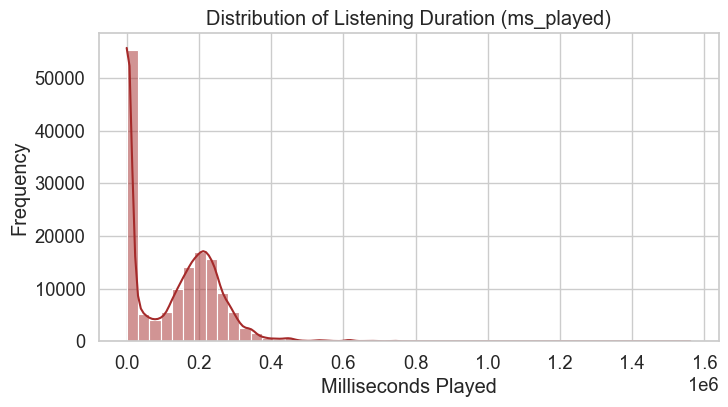

In [67]:
# Distribution of Listening Durations
plt.figure(figsize=(8,4))
sns.histplot(data['ms_played'], bins=50, kde=True, color='brown')
plt.title('Distribution of Listening Duration (ms_played)')
plt.xlabel('Milliseconds Played')
plt.ylabel('Frequency')
plt.show()

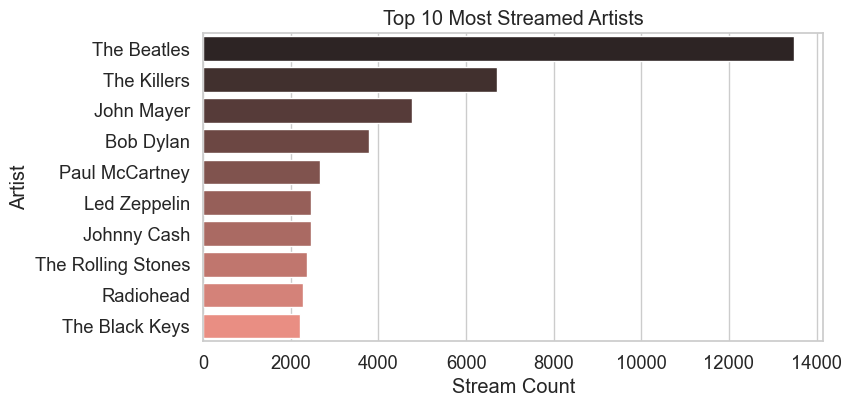

In [58]:
# Top Artists
top_artists = data['artist_name'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(y=top_artists.index, x=top_artists.values, palette='dark:salmon')
plt.title('Top 10 Most Streamed Artists')
plt.xlabel('Stream Count')
plt.ylabel('Artist')
plt.show()

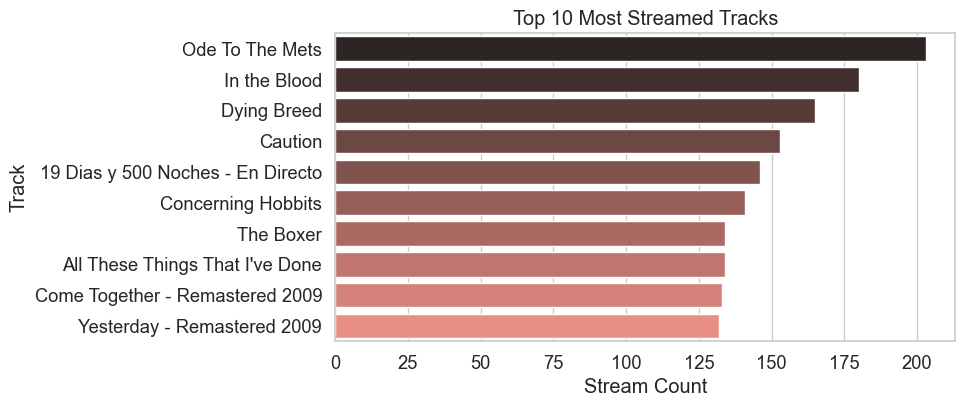

In [59]:
# Top Tracks
top_tracks = data['track_name'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(y=top_tracks.index, x=top_tracks.values, palette='dark:salmon')
plt.title('Top 10 Most Streamed Tracks')
plt.xlabel('Stream Count')
plt.ylabel('Track')
plt.show()

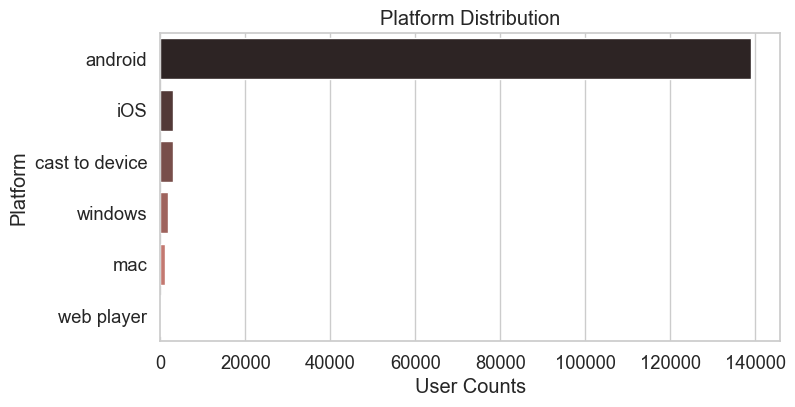

In [71]:
# Platform Usage
platform_counts = data['platform'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(y=platform_counts.index, x=platform_counts.values, palette='dark:salmon')
plt.title('Platform Distribution')
plt.xlabel('User Counts')
plt.ylabel('Platform')
plt.show()

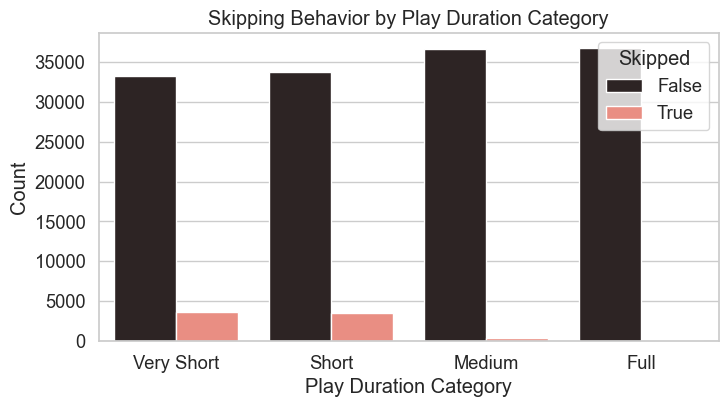

In [74]:
# Skipping Behavior by Play Duration Category
plt.figure(figsize=(8,4))
sns.countplot(data=data, x='play_duration_category', hue='skipped', palette='dark:salmon')
plt.title('Skipping Behavior by Play Duration Category')
plt.xlabel('Play Duration Category')
plt.ylabel('Count')
plt.legend(title='Skipped')
plt.show()

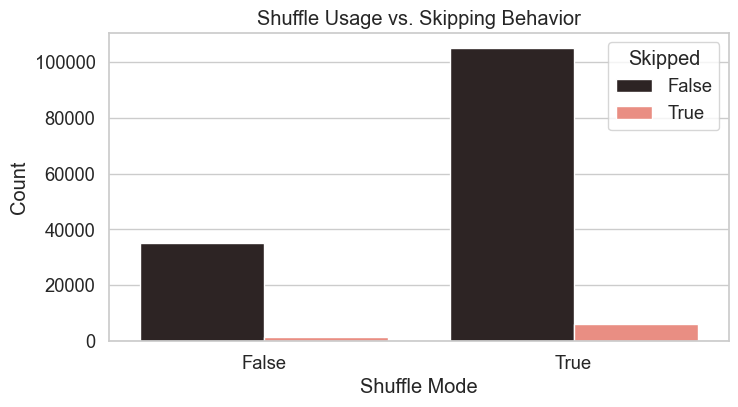

In [75]:
# Shuffle Usage by Skipping Behavior
plt.figure(figsize=(8,4))
sns.countplot(data=data, x='shuffle', hue='skipped', palette='dark:salmon')
plt.title('Shuffle Usage vs. Skipping Behavior')
plt.xlabel('Shuffle Mode')
plt.ylabel('Count')
plt.legend(title='Skipped')
plt.show()